In [1]:
# Starter code
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dat_file = "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Starter code
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
# Add a one second interval between queries to stay within API query limits
time.sleep(1)
    

# loop through the cities response and append each city to the city weather list


lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_found = []

for i, city in enumerate(cities):
       
               
        #url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key + "&q=" + city
        
            
        try:
            url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key + "&q=" + city
            
            
            city_weather = requests.get(url).json()      
            lat.append(city_weather["coord"]["lat"]),
            lon.append(city_weather["coord"]["lon"]),
            temp_max.append(city_weather["main"]["temp_max"]),
            humidity.append(city_weather["main"]["humidity"]),
            cloudiness.append(city_weather["clouds"]["all"]),
            wind_speed.append(city_weather["wind"]["speed"]),
            country.append(city_weather["sys"]["country"]),
            date.append(city_weather["dt"]),
            city_found.append(city_weather["name"])
            
            print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
            
        except:print("city not found, skipping")    
        
        print(city_weather) 
        
        #print()

city not found, skipping
{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 102.87, 'feels_like': 91.54, 'temp_min': 102.87, 'temp_max': 102.87, 'pressure': 1004, 'humidity': 10, 'sea_level': 1004, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 14.81, 'deg': 46}, 'clouds': {'all': 0}, 'dt': 1597089302, 'sys': {'country': 'ML', 'sunrise': 1597038663, 'sunset': 1597085492}, 'timezone': 0, 'id': 2450173, 'name': 'Taoudenni', 'cod': 200}
city not found, skipping
{'coord': {'lon': 17.89, 'lat': -29.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.37, 'feels_like': 39.87, 'temp_min': 45.37, 'temp_max': 45.37, 'pressure': 1018, 'humidity': 59, 'sea_level': 1018, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 287}, 'clouds': {'all': 0}, 'dt': 1597089302, 'sys': {'cou

In [4]:
weather_dict = {
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
    "City_found": city_found,
 }

weather_data = pd.DataFrame(weather_dict)
weather_data.head(600)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_found
0,22.68,-3.98,102.87,10,0,14.81,ML,1597089302,Taoudenni
1,-29.66,17.89,45.37,59,0,3.42,ZA,1597089302,Springbok
2,35.16,112.86,84.00,1,97,4.97,CN,1597089303,Xixiang
3,60.34,102.28,58.03,68,0,1.52,RU,1597089303,Vanavara
4,-34.53,20.04,50.00,93,0,2.24,ZA,1597089303,Bredasdorp
...,...,...,...,...,...,...,...,...,...
569,57.05,-135.33,53.60,87,90,5.82,US,1597089437,Sitka
570,53.60,7.20,78.01,53,20,8.05,DE,1597089438,Norden
571,7.70,28.00,72.45,93,100,1.81,SS,1597089438,Wau
572,6.74,2.66,77.00,88,40,11.41,BJ,1597089438,Sakété


In [5]:
#save weather_data as csv file to output_data ("r../output_data/weather_data,csv")
weather_data.to_csv(r'../output_data/weather_data.csv', index='false')

In [6]:
csvpath = os.path.join("r'../output_data/weather_data.csv")
#print(csvpath)

weather_data.head()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_found
0,22.68,-3.98,102.87,10,0,14.81,ML,1597089302,Taoudenni
1,-29.66,17.89,45.37,59,0,3.42,ZA,1597089302,Springbok
2,35.16,112.86,84.00,1,97,4.97,CN,1597089303,Xixiang
3,60.34,102.28,58.03,68,0,1.52,RU,1597089303,Vanavara
4,-34.53,20.04,50.00,93,0,2.24,ZA,1597089303,Bredasdorp


In [7]:
#Plot the data
#Use the proper labeling of plots using plot titles (includine date of analysis) and axis labels.
#Save the plotted figures as pngs.

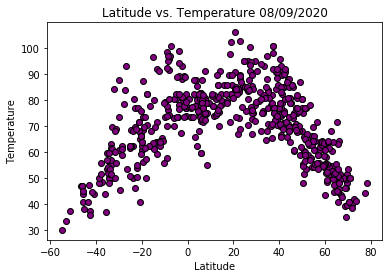

In [23]:
#"Latitude" = weather_data("Latitude")
#"Temperature" = weather_data("Max Temp")


x = []
y = []



plt.scatter(weather_data["Latitude"], weather_data["Max Temp"],  marker="o", facecolors="purple", edgecolors="black")

plt.title('Latitude vs. Temperature 08/09/2020')

plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig('../Images/Lat vs Temp.png')
plt.show()

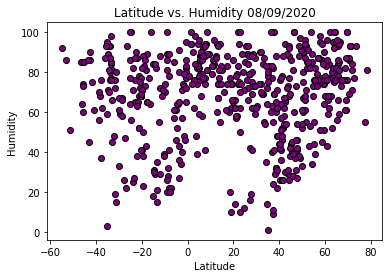

In [25]:
#"Latitude" = weather_data("Latitude")
#"Humidity" = weather_data("Humidity")


x = []
y = []



plt.scatter(weather_data["Latitude"], weather_data["Humidity"],  marker="o", facecolors="purple", edgecolors="black")

plt.title('Latitude vs. Humidity 08/09/2020')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('../Images/Lat vs Humid.png')
plt.show()

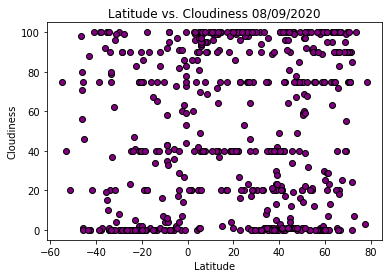

In [26]:
#"Latitude" = weather_data("Latitude")
#"Cloudiness" = weather_data("Cloudiness")


x = []
y = []



plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", facecolors="purple", edgecolors="black")

plt.title('Latitude vs. Cloudiness 08/09/2020')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("../Images/Lat vs Cloudi.png")
plt.show()

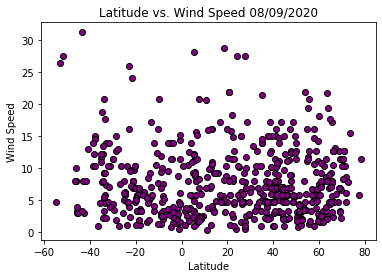

In [27]:
#"Latitude" = weather_data("Latitude")
#"Wind Speed" = weather_data("Wind Speed")


x = []
y = []



plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", facecolors="purple", edgecolors="black")

plt.title('Latitude vs. Wind Speed 08/09/2020')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("../Images/Lat vs Wind.png")
plt.show()

# Optional: Create a function to create Linear Regression plots

In [ ]:
#Create Northern Hemisphere DataFrame

In [ ]:
#Create Southern Hemisphere DataFrame

# Create Northern and Southern Hemisphere Linear Regression

In [ ]:
#Northern Hemisphere - Max Temp vs Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Humidity vs Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Cloudiness vs Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Wind Speed vs Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Max Temp vs Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Humidity vs Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Cloudiness vs Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Wind Speed vs Latitude Linear Regression